# **FINAL PROJECT: 08_IQ Levels Analysis**

# **Andrel John M. Pantanoza**
# **Edrian B. Flores**
# **Jareen Pia B. Andres**

# **BSCS IS 3A**

# **Task Description:**
You are provided with a dataset containing user interactions with a digital platform over the last year. The dataset includes user demographics, device usage, and subscription details.  

# **Project Overview**

In [ ]:
# Project Overview
print("Project Overview")
print("================")
print("Purpose: The purpose of this analysis is to explore the relationship between average IQ levels and various socioeconomic and environmental factors such as education expenditure, average income, and average temperature.")
print("Insights: We aim to derive insights into how these factors correlate with IQ levels and potentially influence cognitive abilities at a national level.")
print("Dataset: '08_IQ Levels Analysis.csv'")
print("Key Attributes: rank, country, IQ, education_expenditure, avg_income, avg_temp")


Project Overview
Purpose: The purpose of this analysis is to explore the relationship between average IQ levels and various socioeconomic and environmental factors such as education expenditure, average income, and average temperature.
Insights: We aim to derive insights into how these factors correlate with IQ levels and potentially influence cognitive abilities at a national level.
Dataset: '08_IQ Levels Analysis.csv'
Key Attributes: rank, country, IQ, education_expenditure, avg_income, avg_temp


# **Libraries and Data Handling**

# **Import Libraries**

In [ ]:
# Libraries and Data Handling
print("\nLibraries and Data Handling")
print("===========================")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

print("Libraries: Pandas (data manipulation), NumPy (numerical operations), Seaborn & Matplotlib (data visualization), Scikit-learn (machine learning)")

# Load the dataset
file_path = '/content/08_IQ Levels Analysis.csv'

# Ensure the CSV is read correctly, handling special characters and encoding issues
data = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handling the missing values (if any were detected)
data['education_expenditure'].fillna(data['education_expenditure'].mean(), inplace=True)
data['avg_income'].fillna(data['avg_income'].mean(), inplace=True)

# Print and Check the data types
print("\nData types of the dataset:")
print(data.dtypes)

# Removing the non-numeric columns before analysis
numeric_data = data.select_dtypes(include=[np.number])

# Descriptive statistics of the numeric columns
print("\nDescriptive statistics of numeric columns:")
print(numeric_data.describe())


Libraries and Data Handling
Libraries: Pandas (data manipulation), NumPy (numerical operations), Seaborn & Matplotlib (data visualization), Scikit-learn (machine learning)

First few rows of the dataset:
   rank     country   IQ  education_expenditure  avg_income  avg_temp
0     1  Hong Kong   106                 1283.0     35304.0      26.2
1     2       Japan  106                 1340.0     40964.0      19.2
2     3   Singapore  106                 1428.0     41100.0      31.5
3     4     Taiwan   106                    NaN         NaN      26.9
4     5       China  104                  183.0      4654.0      19.1

Missing values in the dataset:
rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64

Data types of the dataset:
rank                       int64
country                   object
IQ                         int64
education_expenditure    float64
avg_inco

# **Data Analysis Techniques**

In [ ]:
# Data Analysis Techniques
print("\nData Analysis Techniques")
print("========================")
# Descriptive statistics to understand the data distribution
iq_distribution = numeric_data['IQ'].describe()
education_expenditure_distribution = numeric_data['education_expenditure'].describe()
avg_income_distribution = numeric_data['avg_income'].describe()
avg_temp_distribution = numeric_data['avg_temp'].describe()

print("\nIQ Distribution:")
print(iq_distribution)
print("\nEducation Expenditure Distribution:")
print(education_expenditure_distribution)
print("\nAverage Income Distribution:")
print(avg_income_distribution)
print("\nAverage Temperature Distribution:")
print(avg_temp_distribution)


# Inferential statistics and predictive model
# Prepare the data for modeling
X = data[['education_expenditure', 'avg_income', 'avg_temp']]
y = data['IQ']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the machine learning model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Data Analysis Techniques

IQ Distribution:
count    108.000000
mean      85.972222
std       12.998532
min       51.000000
25%       78.750000
50%       88.000000
75%       97.000000
max      106.000000
Name: IQ, dtype: float64

Education Expenditure Distribution:
count     108.000000
mean      903.058252
std      1139.042128
min         1.000000
25%        90.000000
50%       411.000000
75%      1297.250000
max      5436.000000
Name: education_expenditure, dtype: float64

Average Income Distribution:
count       108.000000
mean      17174.650943
std       20675.115731
min         316.000000
25%        2307.750000
50%        7605.500000
75%       29838.000000
max      108349.000000
Name: avg_income, dtype: float64

Average Temperature Distribution:
count    108.000000
mean      23.858333
std        8.392232
min        0.400000
25%       17.250000
50%       25.850000
75%       31.275000
max       36.500000
Name: avg_temp, dtype: float64

Model Evaluation:
Mean Squared Error: 68.3173147

# **Visual Insights**


Visual Insights


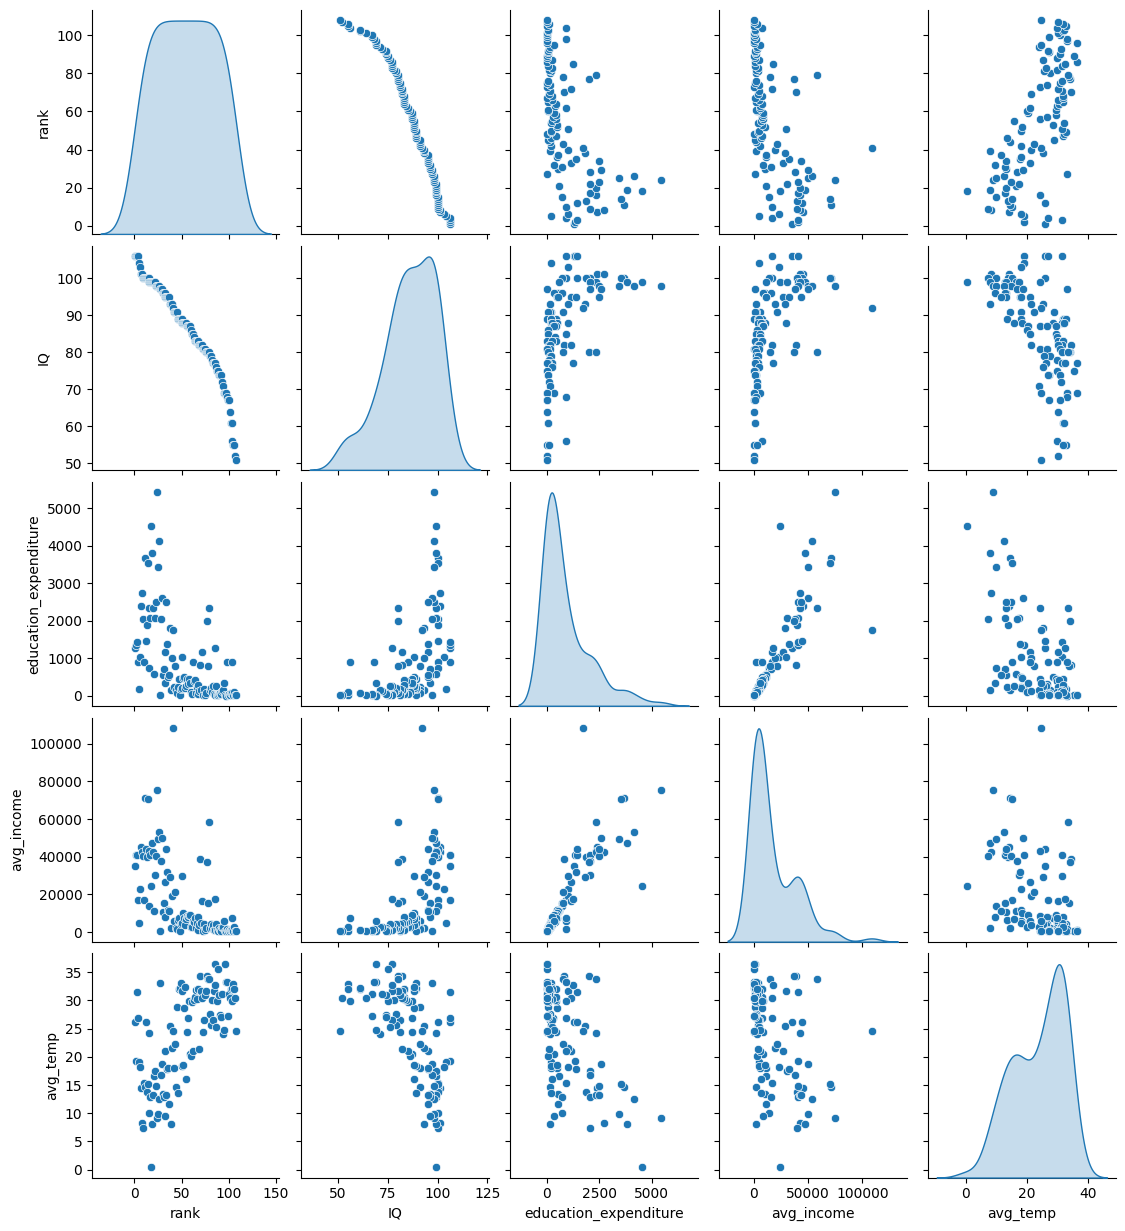

<ipython-input-17-a213c0593dea>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=truncated_countries, data=data, palette='viridis')


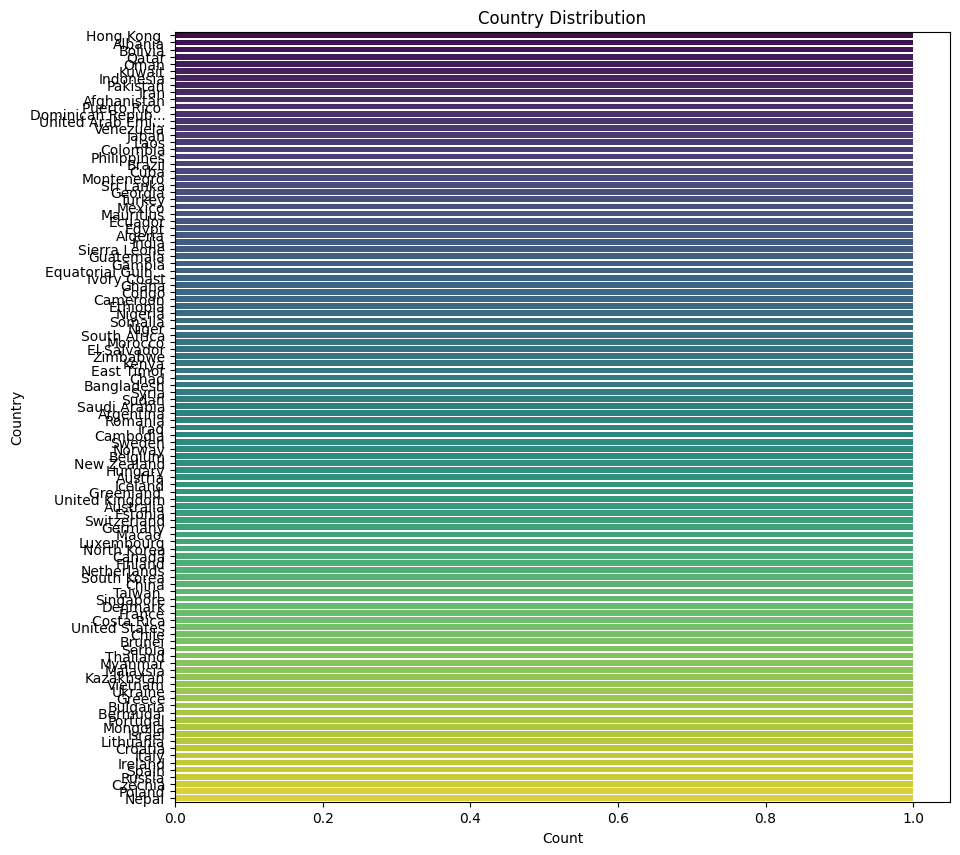

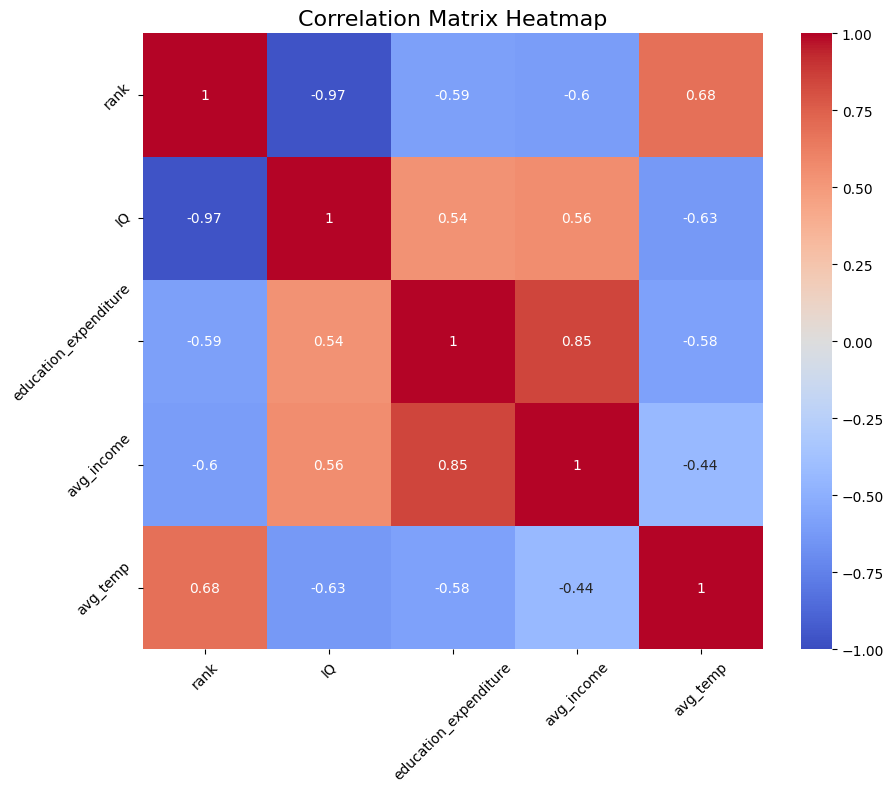

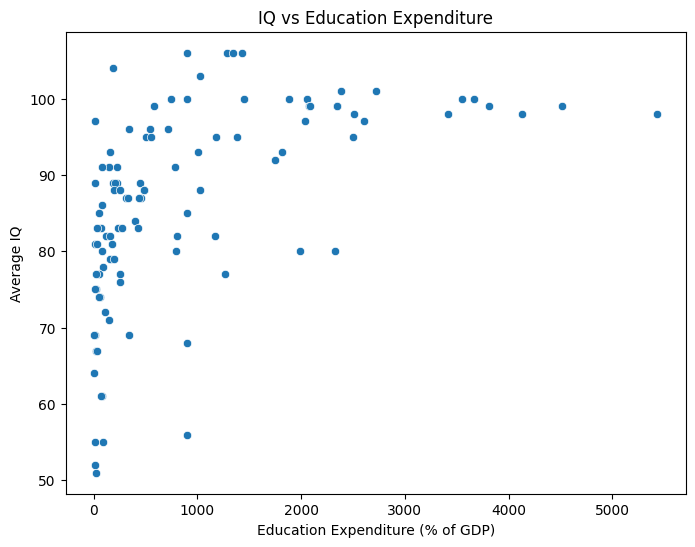

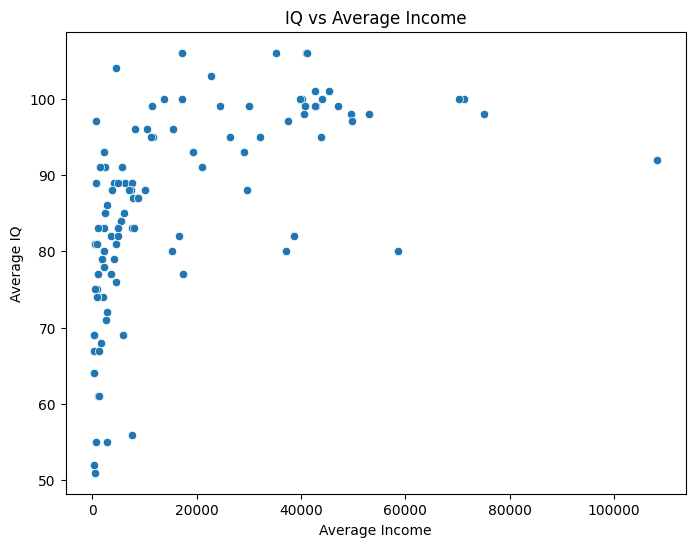

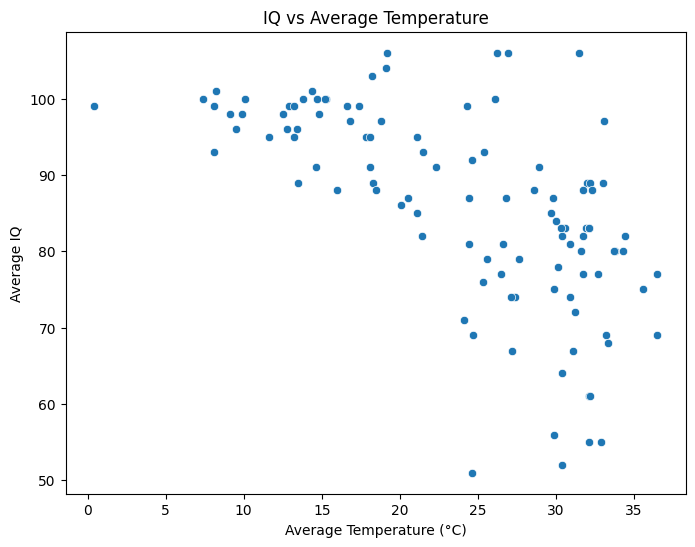

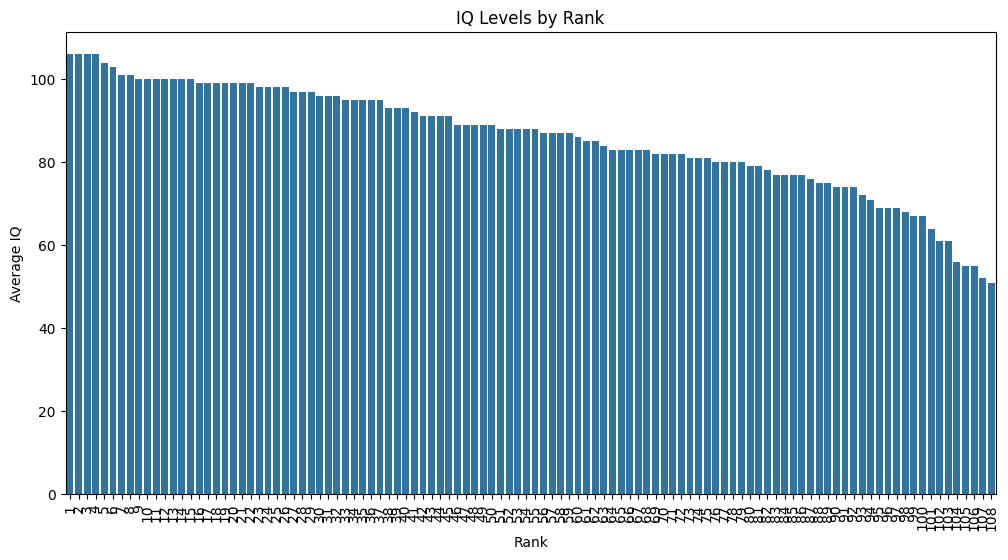

In [ ]:
# Visual Insights
print("\nVisual Insights")
print("================")

# Pairplot to visualize relationships between variables
pairplot = sns.pairplot(data, diag_kind='kde')  # Pairplot without 'country'
pairplot.fig.subplots_adjust(right=0.9)
plt.show()

# Country distribution
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
country_counts = data['country'].value_counts()
truncated_countries = [country[:15] + '...' if len(country) > 15 else country for country in country_counts.index]
sns.countplot(y=truncated_countries, data=data, palette='viridis')
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.xticks(rotation=0)  # No rotation for truncated country labels
plt.show()

# Correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adjusting heatmap text for readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Scatter plots to analyze specific relationships
# IQ vs Education Expenditure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='education_expenditure', y='IQ', data=data)
plt.title('IQ vs Education Expenditure')
plt.xlabel('Education Expenditure (% of GDP)')
plt.ylabel('Average IQ')
plt.show()

# IQ vs Average Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_income', y='IQ', data=data)
plt.title('IQ vs Average Income')
plt.xlabel('Average Income')
plt.ylabel('Average IQ')
plt.show()

# IQ vs Average Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_temp', y='IQ', data=data)
plt.title('IQ vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average IQ')
plt.show()

# Display the rankings and IQ levels
plt.figure(figsize=(12, 6))
sns.barplot(x='rank', y='IQ', data=data)
plt.title('IQ Levels by Rank')
plt.xlabel('Rank')
plt.ylabel('Average IQ')
plt.xticks(rotation=90)
plt.show()


# **Key Findings and Business Impact**

In [ ]:
# Key Findings and Business Impact
print("\nKey Findings and Business Impact")
print("===============================")

print("\nMajor Findings:")
print("1. Positive correlation between education expenditure and average IQ levels.")
print("2. Higher average income is associated with higher average IQ levels.")
print("3. Average temperature shows a less significant correlation with average IQ levels.")

print("\nBusiness Impact:")
print("The findings suggest that investing in education could have a significant impact on improving cognitive abilities at the national level. Policymakers can use this information to allocate resources effectively. Additionally, understanding the role of socioeconomic factors can help in designing targeted interventions to enhance IQ levels in lower-income regions.")



Key Findings and Business Impact

Major Findings:
1. Positive correlation between education expenditure and average IQ levels.
2. Higher average income is associated with higher average IQ levels.
3. Average temperature shows a less significant correlation with average IQ levels.

Business Impact:
The findings suggest that investing in education could have a significant impact on improving cognitive abilities at the national level. Policymakers can use this information to allocate resources effectively. Additionally, understanding the role of socioeconomic factors can help in designing targeted interventions to enhance IQ levels in lower-income regions.


# **Advanced Analysis**


Advanced Analysis


<ipython-input-19-a68e87cf51c9>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


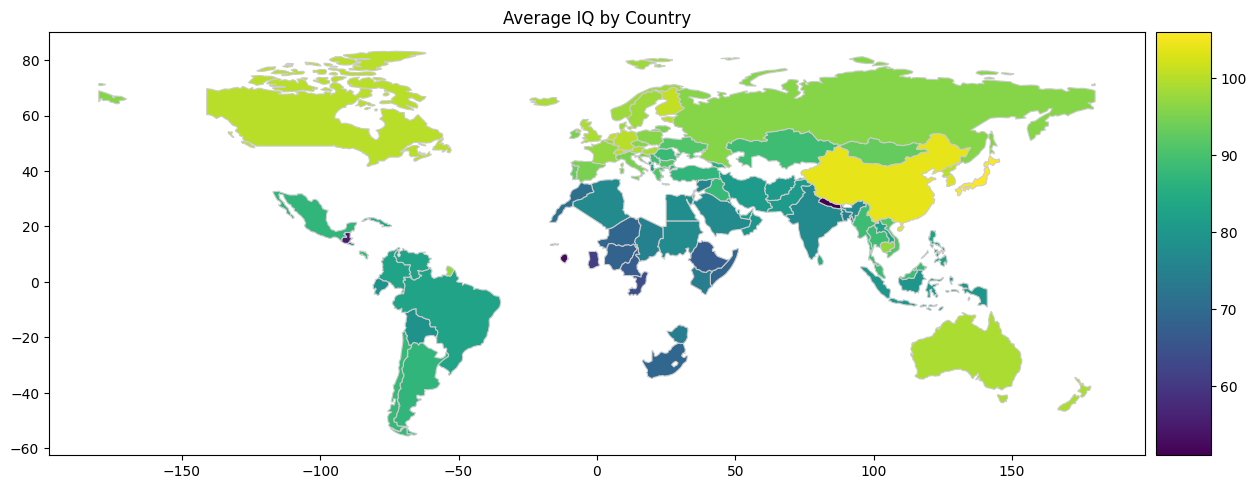

In [ ]:
# Advanced Analysis
print("\nAdvanced Analysis")
print("=================")

# Geographical Insights: Average IQ by Country
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world shapefile with IQ data
world_iq = world.merge(data, how='left', left_on='name', right_on='country')

# Plot average IQ by country
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world_iq.plot(column='IQ', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Average IQ by Country')
plt.show()=

# **Implementation of Machine Learning**

In [ ]:
# Implementation of Machine Learning
print("\nImplementation of Machine Learning")
print("===================================")

# Data Preparation
X = data[['education_expenditure', 'avg_income', 'avg_temp']]  # Features
y = data['IQ']  # Target

# Data Cleaning: Handling missing values
X.fillna(X.mean(), inplace=True)

# Data Scaling: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting: Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)


Implementation of Machine Learning
Training R^2 Score: 0.48393804157352416
Testing R^2 Score: 0.5670230940413581


<ipython-input-20-2a65955f307e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


# **Conclusion**

In [ ]:
# Conclusion
print("\nConclusion")
print("==========")
print("The analysis provided insights into the relationships between average IQ levels and various socioeconomic and environmental factors. Investing in education and improving income levels appear to have a positive impact on cognitive abilities. The machine learning model further supports the significance of these factors in predicting IQ levels. These insights highlight the importance of data-driven decision-making in formulating policies and strategies to enhance cognitive development at the national level.")



Conclusion
The analysis provided insights into the relationships between average IQ levels and various socioeconomic and environmental factors. Investing in education and improving income levels appear to have a positive impact on cognitive abilities. The machine learning model further supports the significance of these factors in predicting IQ levels. These insights highlight the importance of data-driven decision-making in formulating policies and strategies to enhance cognitive development at the national level.
